# Q9 New data.

In [5]:
# Q9: New data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
df = pd.read_csv('csgo_dataset.csv')

print(f'shape: {df.shape}')
print(f'columns: {df.columns}')

# Keep recent matches
df = df.iloc[0:15000]


# create a dataframe with team_1 and team_2 as one column
teams_df = pd.DataFrame()
teams_df['team'] = pd.concat([df['team_1'], df['team_2']])

print(f'\nshape: {teams_df.shape}')
# Nr of unique teams in the dataset
print(f'\nNr of unique teams: {teams_df.team.nunique()}')
print(f'\nNumber of teams with more than 200 matches: {teams_df.team.value_counts()[teams_df.team.value_counts() > 200].count()}')

# Remove all games (rows) with teams that have less than 200 matches in the original dataset
df = df[df.team_1.isin(teams_df.team.value_counts()[teams_df.team.value_counts() > 200].index)]
print(f'\nshape: {df.shape}')
df = df[df.team_2.isin(teams_df.team.value_counts()[teams_df.team.value_counts() > 200].index)]
print(f'\nshape: {df.shape}')

print(f'\nNr of unique teams: {df.team_2.nunique()}')

# create a dataframe with team_1 and team_2 as one column
teams_df = pd.DataFrame()
teams_df['team'] = pd.concat([df['team_1'], df['team_2']])

print(f'\nshape: {teams_df.shape}')
# Nr of unique teams in the dataset
print(f'\nNr of unique teams: {teams_df.team.nunique()}')
print(f'\nNumber of teams with more than 200 matches: {teams_df.team.value_counts()[teams_df.team.value_counts() > 10]}')


shape: (45773, 19)
columns: Index(['date', 'team_1', 'team_2', '_map', 'result_1', 'result_2',
       'map_winner', 'starting_ct', 'ct_1', 't_2', 't_1', 'ct_2', 'event_id',
       'match_id', 'rank_1', 'rank_2', 'map_wins_1', 'map_wins_2',
       'match_winner'],
      dtype='object')

shape: (30000, 1)

Nr of unique teams: 654

Number of teams with more than 200 matches: 47

shape: (6712, 19)

shape: (3401, 19)

Nr of unique teams: 47

shape: (6802, 1)

Nr of unique teams: 47

Number of teams with more than 200 matches: forZe                253
HAVU                 245
Vitality             229
Sprout               223
Tricked              219
AGO                  214
AVANGAR              209
G2                   204
Heroic               201
Spirit               197
Nemiga               188
Windigo              186
Virtus.pro           186
Liquid               182
GamerLegion          178
Movistar Riders      174
BIG                  172
fnatic               161
Copenhagen Flames    16

## Results:
 We now have a df with 3401 games, 47 teams, all with 200+ games in total, and all between [35, 253] games in the final dataset

In [6]:
# change the column map_winner values to 1 and -1
from numpy import sign
from Preprocessing_serieA_function import preprocess_serieA_no_draws as pre

# for i in range(len(df)):
#     if sign(df['result_1'].iloc[i] - df['result_2'].iloc[i]) == 0:
#         print('\nError in row: ', i)
#         print(df.iloc[i])

df = pre(df, 'csgo')
print(df.head())
print(f'\nshape: {df.shape}')


     team1            team2  score_diff  y
9   fnatic              BIG          -4 -1
10  Sprout  Movistar Riders           6  1
18     AGO      HellRaisers          11  1
19     AGO      HellRaisers          11  1
20  Sprout  Movistar Riders           9  1

shape: (3394, 4)


# CSGO dataset is now preprocessed
### Lets: go

In [7]:
from df_to_dic_script import df_to_dictionary as df_to_dic

csgo_dic = df_to_dic(df)
print(csgo_dic.keys())


dict_keys(['Spirit', 'North', 'PACT', 'Valiance', 'Copenhagen Flames', 'ENCE', 'W7M', 'AGO', 'Unique', 'pro100', 'GamerLegion', 'Movistar Riders', 'Winstrike', 'Grayhound', 'Heroic', 'BIG', 'ORDER', 'SJ', 'AVANGAR', 'Vitality', 'fnatic', 'FURIA', 'Virtus.pro', 'ALTERNATE aTTaX', 'Liquid', 'DETONA', 'Chiefs', 'FaZe', 'HellRaisers', 'Tricked', 'Nemiga', 'Heretics', 'TeamOne', 'TYLOO', 'G2', 'Astralis', 'MIBR', 'forZe', 'INTZ', 'Sprout', 'NiP', 'mousesports', 'HAVU', 'DreamEaters', 'Singularity', 'Chaos', 'Windigo'])


In [4]:
# ADF
from ADF_script import ADF

results_dic, predictions = ADF(csgo_dic, df)

In [8]:
# Create dataframe of means and variances an sort by means
from numpy import sign
from sklearn.metrics import accuracy_score
teams_df = pd.DataFrame(results_dic, index=['mean', 'variance']).T
teams_df = teams_df.sort_values(by=['mean'], ascending=False)
print('Teams after the season, no shuffle:')
print(teams_df)

# Calculate prediction rate
from sklearn.metrics import accuracy_score
y_true = sign(df['score_diff']).tolist()
prediction_rate = accuracy_score(y_true, predictions)
print(f'\nPrediction rate of One-Step-Ahead prediction: {prediction_rate}')

# prediction rate of last 60 games
y_true_last_60 = y_true[-60:]
predictions_last_60 = predictions[-60:]
prediction_rate_last_60 = accuracy_score(y_true_last_60, predictions_last_60)
print(f'\nPrediction rate of One-Step-Ahead prediction for last 60 games: {prediction_rate_last_60}')

Teams after the season, no shuffle:
                        mean  variance
HAVU               45.399050  0.252836
fnatic             43.983383  0.349155
Valiance           42.126143  0.146061
Astralis           41.460824  0.095420
MIBR               37.969604  0.230447
North              37.884376  0.838966
Spirit             37.821397  0.095173
NiP                37.020101  0.714597
SJ                 34.948453  0.221274
Windigo            34.555075  0.048858
Sprout             33.304795  0.033404
Winstrike          33.097466  0.108520
mousesports        33.020734  0.266044
pro100             32.673950  0.347085
Chiefs             32.653549  0.255527
TYLOO              32.186936  0.072056
Liquid             31.966211  0.095065
AVANGAR            31.737960  0.049332
Copenhagen Flames  30.461015  0.207920
FURIA              28.922990  0.181809
HellRaisers        28.869383  0.106598
G2                 28.496939  0.213666
ENCE               28.029786  0.092452
BIG                27.139374

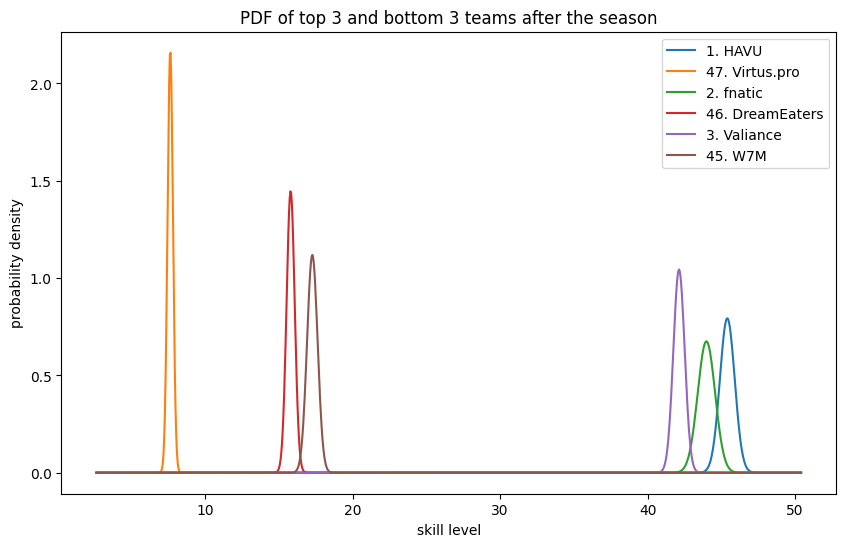

In [11]:
# Plot the pdf of the three top teams and the three bottom teams
from scipy import stats
plt.figure(figsize=(10, 6))
x = np.linspace(min(teams_df['mean'])-5, max(teams_df['mean'])+5, 1000)

for i in range(3):
    y_top = stats.norm.pdf(x, teams_df.iloc[i, 0], np.sqrt(teams_df.iloc[i, 1]))
    y_bottom = stats.norm.pdf(x, teams_df.iloc[-i-1, 0], np.sqrt(teams_df.iloc[-i-1, 1]))

    plt.plot(x, y_top, label=f'{i+1}. {teams_df.index[i]}')
    plt.plot(x, y_bottom, label=f'{len(teams_df)-i}. {teams_df.index[-i-1]}')

plt.title('PDF of top 3 and bottom 3 teams after the season')
plt.xlabel('skill level')
plt.ylabel('probability density')
plt.legend()
plt.show()